**Tarefas**

https://investexcel.net/all-yahoo-finance-stock-tickers/

**-base básica com x e y (Alex)**

*-lógica do python para calcular o ganho com base nos cruzamentos (Robert) - OK*

-acrescentar as médias (simples e exponenciais)

-acrescentar variáveis temporais

-acrescentar web scrapping para buscar notícias

-acrescentar NLP

-acrescentar sazonalidade

-ranking de ações




---



Resultado final:
Criar top n de ações com maior potencial de crescimento.


Criar uma decisão para ação (comprar ou vender) com nota.


Colocar um job.


Colocar notificações.


Automatizar a compra.


In [ ]:
#!pip install yahooquery

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

from yahooquery import Ticker
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
symbol = 'PETR4.SA'
df = Ticker(symbol).history(period='max')
df = df.droplevel(0, 'index')
df.head()

,volume,close,low,high,open,adjclose,dividends,splits
date,,,,,,,,
2000-01-03,3.538944e+10,5.875,5.875,5.875,5.875,4.050103,0.0,0.0
2000-01-04,2.886144e+10,5.550,5.550,5.550,5.550,3.826055,0.0,0.0
2000-01-05,4.303360e+10,5.494,5.494,5.494,5.494,3.787450,0.0,0.0
2000-01-06,3.405568e+10,5.475,5.475,5.475,5.475,3.774351,0.0,0.0
2000-01-07,2.091264e+10,5.500,5.500,5.500,5.500,3.791586,0.0,0.0


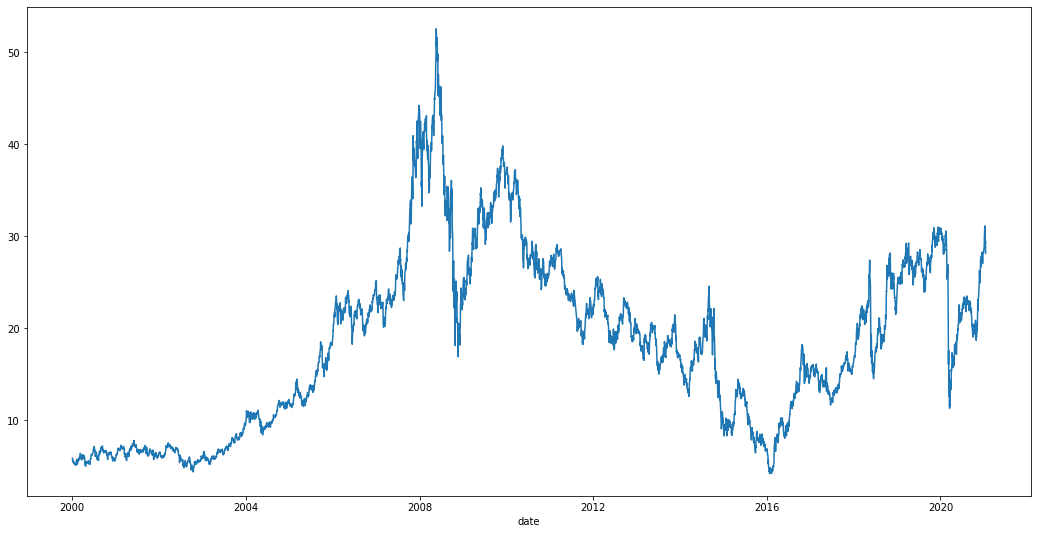

In [ ]:
plt.rcParams["figure.figsize"] = [18,9]
df['close'].plot();

In [ ]:
df['media7'] = df.close.rolling(7).mean()
df['media15'] = df.close.rolling(15).mean()
df['media30'] = df.close.rolling(30).mean()
df['media60'] = df.close.rolling(60).mean()
df['media90'] = df.close.rolling(90).mean()
df['media120'] = df.close.rolling(120).mean()

In [ ]:
data_inicio = '2020-01-01'
data_inicio = dt.datetime.strptime(data_inicio, '%Y-%m-%d').date()
df_2020 = df[df.index >= data_inicio]
df_2020

,volume,close,low,high,open,adjclose,dividends,splits,media7,media15,media30,media60,media90,media120
date,,,,,,,,,,,,,,
2020-01-02,37774500.0,30.700001,30.309999,30.700001,30.510000,30.697731,0.0,0.0,30.525715,30.365333,29.917000,29.262667,28.339444,27.838667
2020-01-03,71595600.0,30.450001,30.450001,31.240000,30.879999,30.447748,0.0,0.0,30.502857,30.381334,29.955333,29.324500,28.397556,27.855750
2020-01-06,81844000.0,30.809999,29.950001,30.940001,30.430000,30.807720,0.0,0.0,30.581429,30.406000,30.013000,29.396167,28.470111,27.874750
2020-01-07,32822000.0,30.690001,30.469999,30.879999,30.820000,30.687731,0.0,0.0,30.608572,30.425334,30.076667,29.471500,28.544889,27.895667
2020-01-08,48215600.0,30.500000,30.240000,30.770000,30.690001,30.497744,0.0,0.0,30.550000,30.394000,30.098333,29.546167,28.613333,27.917917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,48744700.0,30.860001,30.400000,31.059999,30.610001,30.860001,0.0,0.0,30.050000,28.915334,27.781667,24.458667,23.372333,23.231417
2021-01-12,65691900.0,30.629999,30.629999,31.559999,31.120001,30.629999,0.0,0.0,30.377143,29.078000,27.927667,24.639167,23.466556,23.297333
2021-01-13,93826600.0,29.150000,29.000000,30.860001,30.680000,29.150000,0.0,0.0,30.411429,29.138667,28.038667,24.789500,23.540000,23.350750


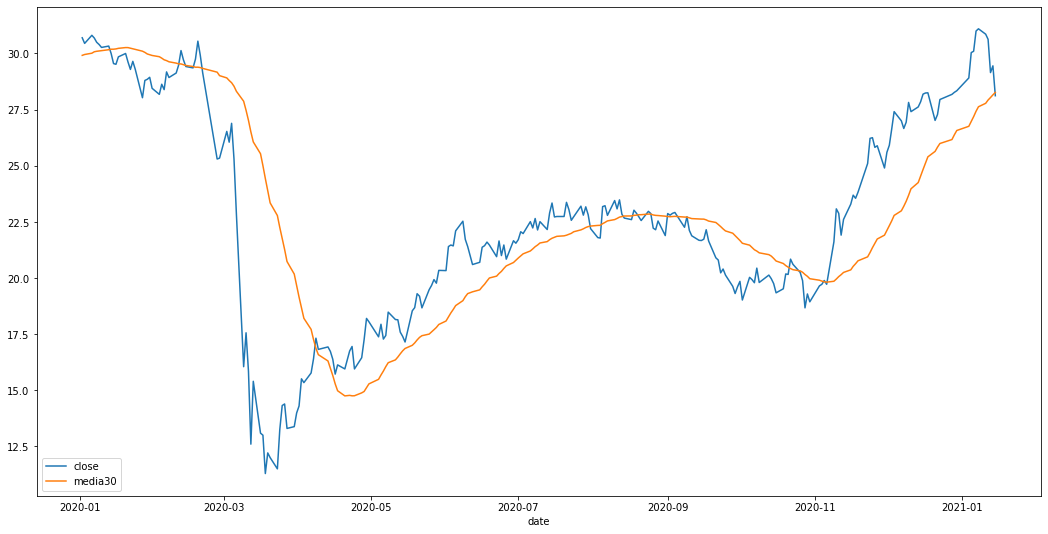

In [ ]:
cols = ['close', 'media30']
df_2020 = df_2020[cols]
df_2020.plot();

In [ ]:
df_2020.head()

,close,media30
date,,
2020-01-02,30.700001,29.917000
2020-01-03,30.450001,29.955333
2020-01-06,30.809999,30.013000
2020-01-07,30.690001,30.076667
2020-01-08,30.500000,30.098333


In [ ]:
df_2020['close_maior'] = np.where(df_2020['close'] > df_2020['media30'], 1,
                                            np.where(df_2020['close'] < df_2020['media30'], -1, 0)
                                            )

df_2020['close_maior_shift'] = df_2020['close_maior'].shift()
df_2020['cruzou'] = np.where(df_2020['close_maior_shift'] == df_2020['close_maior'], 0, 1)
df_2020['comprar'] = np.where((df_2020['cruzou'] == 1) & (df_2020['close_maior'] == 1), 1, 0)
df_2020['vender'] = np.where((df_2020['cruzou'] == 1) & (df_2020['close_maior'] == -1), 1, 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
df_2020.head()

,close,media30,close_maior,close_maior_shift,cruzou,comprar,vender
date,,,,,,,
2020-01-02,30.700001,29.917000,1,NaN,1,1,0
2020-01-03,30.450001,29.955333,1,1.0,0,0,0
2020-01-06,30.809999,30.013000,1,1.0,0,0,0
2020-01-07,30.690001,30.076667,1,1.0,0,0,0
2020-01-08,30.500000,30.098333,1,1.0,0,0,0


In [ ]:
df_2020['comprar'].value_counts(dropna=False)

0    245
1     12
Name: comprar, dtype: int64

In [ ]:
df_2020['vender'].value_counts(dropna=False)

0    245
1     12
Name: vender, dtype: int64

In [ ]:
pontos_compra = df_2020.query("comprar == 1")
pontos_venda = df_2020.query("vender == 1")

In [ ]:
pontos_venda.tail()

,close,media30,close_maior,close_maior_shift,cruzou,comprar,vender
date,,,,,,,
2020-09-08,22.260000,22.715000,-1,1.0,1,0,1
2020-09-10,22.120001,22.677667,-1,1.0,1,0,1
2020-10-26,20.250000,20.316667,-1,1.0,1,0,1
2020-11-06,19.719999,19.815000,-1,1.0,1,0,1
2021-01-15,28.120001,28.264667,-1,1.0,1,0,1


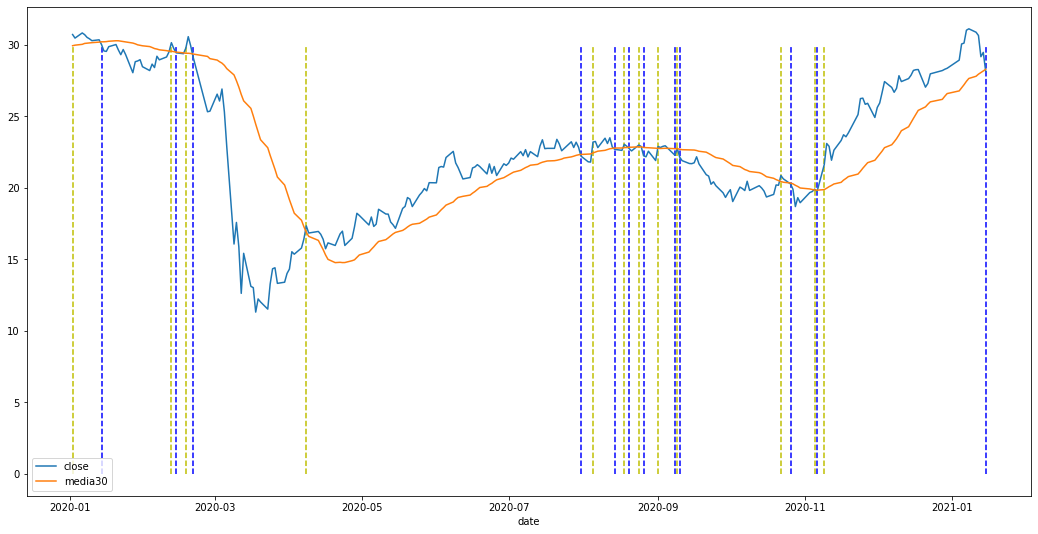

In [ ]:
cols = ['close', 'media30']
df_2020[cols].plot();
plt.vlines(x=pontos_compra.index, ymin=0, ymax=30, colors='y', linestyles='dashed');
plt.vlines(x=pontos_venda.index, ymin=0, ymax=30, colors='b', linestyles='dashed');
plt.show()